In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

1. Choose a new image, different from the ones used in this notebook

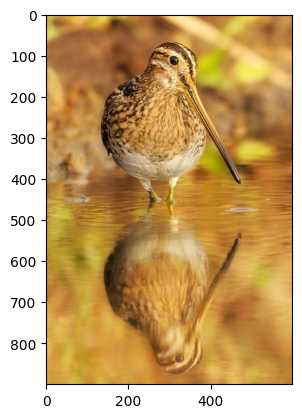

In [2]:
# Import image with skimage, and visualize with matplotlib
im = io.imread('meep.jpg')
plt.imshow(im); plt.show()

In [3]:
# Class and data type
print(type(im))
print(im.dtype)
print(im.shape) # 3 channels, no transparency channel

<class 'numpy.ndarray'>
uint8
(900, 600, 3)


2- Convert into YcbCr color space

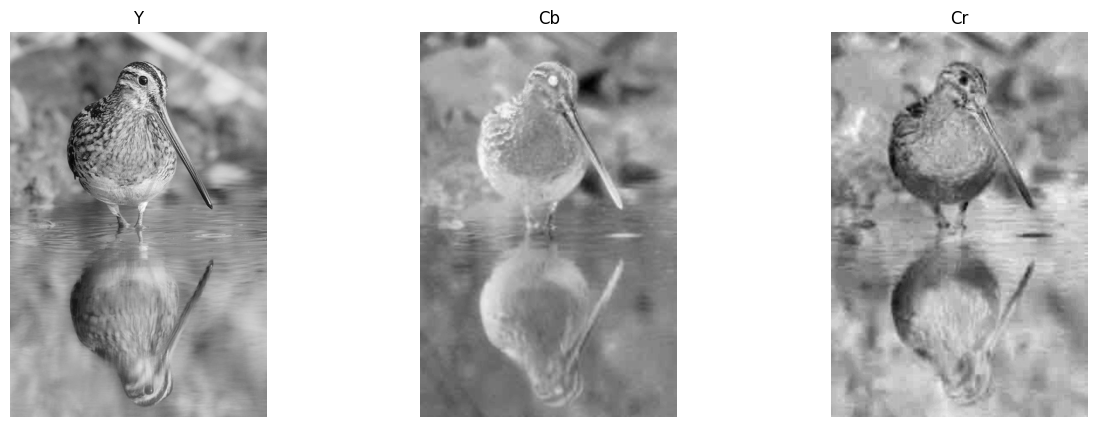

In [4]:
im_ycbcr = color.rgb2ycbcr(im)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(im_ycbcr[:, :, 0], cmap='gray')
axs[0].set_title('Y')
axs[1].imshow(im_ycbcr[:, :, 1], cmap='gray')
axs[1].set_title('Cb')
axs[2].imshow(im_ycbcr[:, :, 2], cmap='gray')
axs[2].set_title('Cr')

for ax in axs:
    ax.axis('off')

plt.show()

3- Blur Cb and Cr channels using a wide gaussian filter

In [5]:
def compress_CbCr(im, sigma):

    im_ycbcr = color.rgb2ycbcr(im)


    im_ycbcr[:, :, 1] = filters.gaussian(im_ycbcr[:, :, 1], sigma=sigma)
    im_ycbcr[:, :, 2] = filters.gaussian(im_ycbcr[:, :, 2], sigma=sigma)


    im_rgb = color.ycbcr2rgb(im_ycbcr)

    return im_rgb


In [6]:
#sigma
sigma = 20
im_blurred = compress_CbCr(im, sigma)


5- Blur only the Y channel (and keep the original Cb and Cr)

In [7]:
def compress_Y(im, sigma):

    im_ycbcr = color.rgb2ycbcr(im)


    im_ycbcr[:, :, 0] = filters.gaussian(im_ycbcr[:, :, 0], sigma=sigma)


    im_rgb = color.ycbcr2rgb(im_ycbcr)

    return im_rgb

In [8]:
sigma = 20
im_yblur = compress_Y(im, sigma)


3/6- Blur Cb and Cr channels using a wide gaussian filter

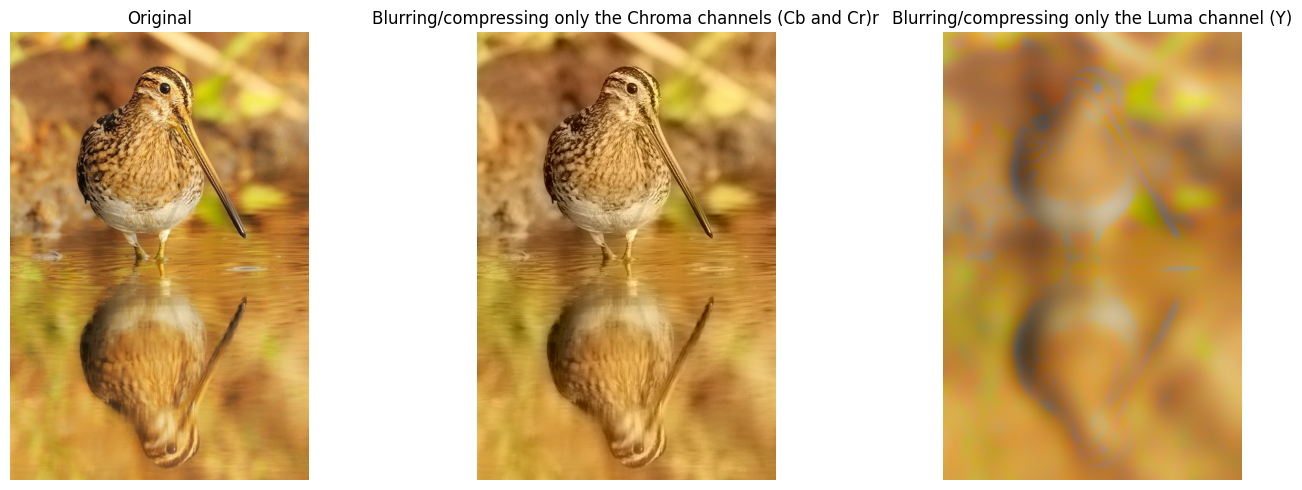

In [9]:
im_ycbcr = color.rgb2ycbcr(im)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(im)
axs[0].set_title('Original')

axs[2].imshow(im_yblur)
axs[2].set_title('Blurring/compressing only the Luma channel (Y)')

axs[1].imshow(im_blurred)
axs[1].set_title('Blurring/compressing only the Chroma channels (Cb and Cr)r')


for ax in axs:
    ax.axis('off')


plt.tight_layout()
plt.show()